# Total Bookings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = pd.read_csv('/content/booking_hotel_clean.csv')

In [2]:
total_bookings = df_clean.groupby(['hotel','date_normalize']).agg({'hotel':'count'})
total_bookings.columns = ['total']
total_bookings = total_bookings.reset_index()
total_bookings['date_normalize'] = pd.to_datetime(total_bookings['date_normalize'])

In [3]:
#Export csv to visualize data using dashboard in Tableau
# total_bookings.to_csv('total_bookings.csv', index=False)

## Monthly

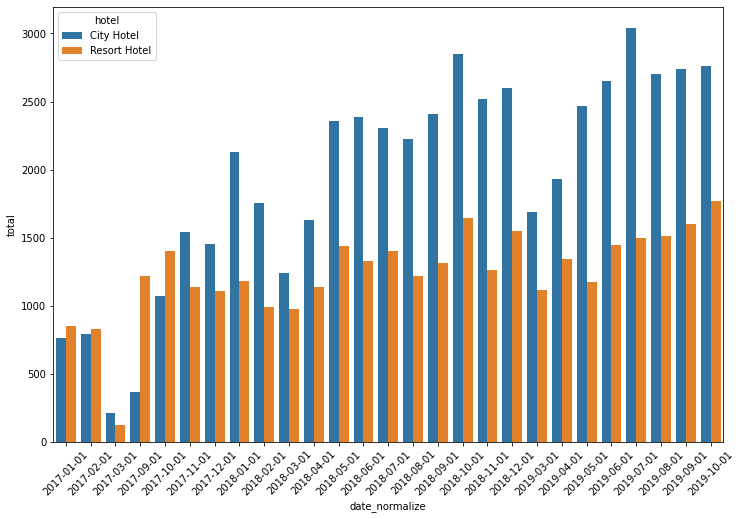

In [4]:
total_bookings1 = total_bookings.copy()
total_bookings1.date_normalize = total_bookings1.date_normalize.astype(str)
#Visualize Data

plt.figure(figsize=(12,8))
sns.barplot(x="date_normalize", y="total", hue="hotel", data=total_bookings1)
plt.xticks(rotation=45)
plt.show()

## Quarterly

In [5]:
total_bookings2 = total_bookings.copy()
total_bookings2['year'] = total_bookings2['date_normalize'].dt.year
total_bookings2['quarter'] = total_bookings2['date_normalize'].dt.quarter


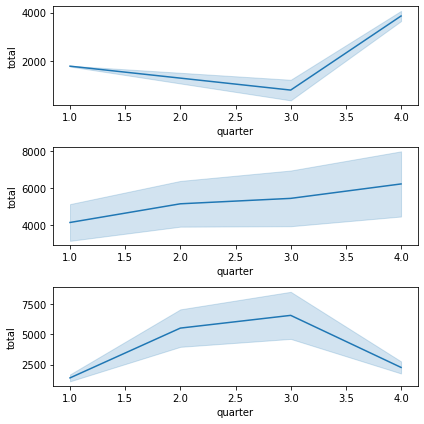

In [6]:
quarterly = total_bookings2.groupby(['hotel', 'quarter', 'year']).agg({'total':'sum'}).reset_index().sort_values('year', ignore_index=True)

fig, ax = plt.subplots(3,1,figsize=(6,6))
sns.lineplot(x ='quarter', y ='total', data = quarterly[0:6], ax=ax[0])
sns.lineplot(x ='quarter', y ='total', data = quarterly[6:14], ax=ax[1])
sns.lineplot(x ='quarter', y ='total', data = quarterly[14:], ax=ax[2])
plt.tight_layout()
plt.show()

## Yearly

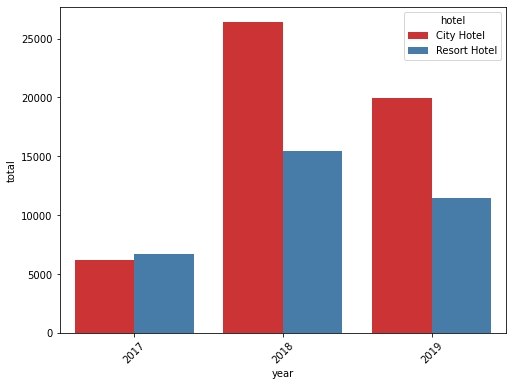

In [7]:
yearly = total_bookings2.groupby(['hotel', 'year']).agg({'total':'sum'}).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='year',y='total',data=yearly,hue='hotel',palette='Set1')
plt.xticks(rotation=45)
plt.show()